##Practical 4: Linear Regression Model on Boston Housing data
#### Roll No: 12 A1 Snehal Rakas


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('BostonHousing.csv')


In [ ]:
# Display the first few rows
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
print(data.isnull().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


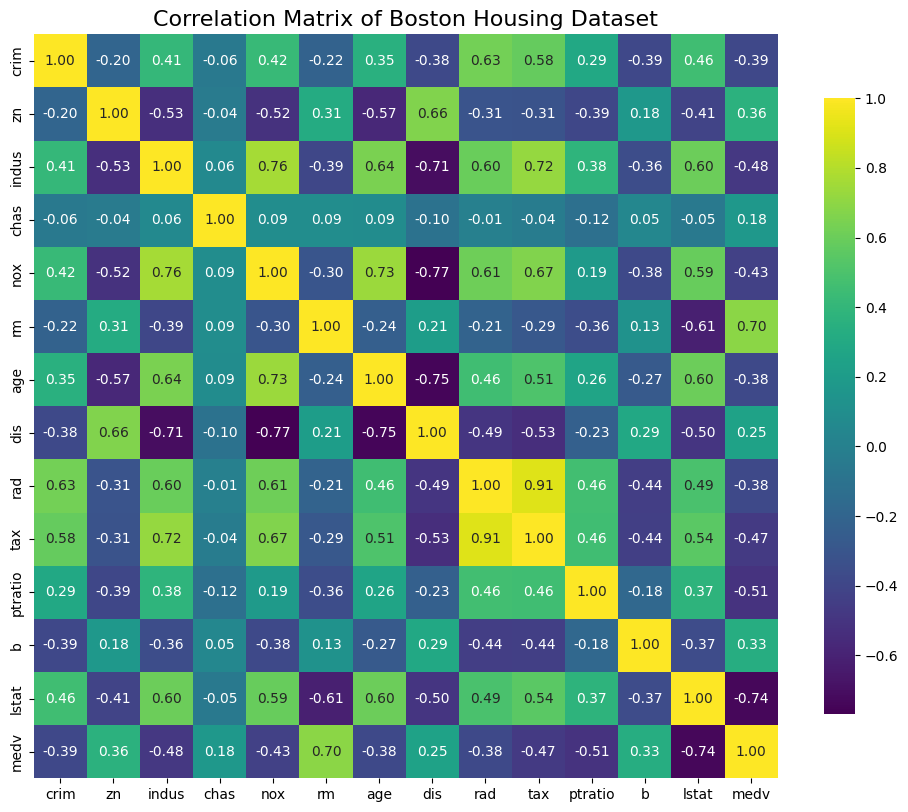

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with a different color palette
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Matrix of Boston Housing Dataset', fontsize=16)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split features and target variable
X = data.drop("medv", axis=1)  # Features
y = data["medv"]                # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print()

# Create and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Make predictions
y_pred = lr_model.predict(X_test)
print(y_pred)


[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620627 20

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')



Mean Squared Error: 24.29
R² Score: 0.67


In [ ]:
# Display coefficients
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
crim       -0.113056
zn          0.030110
indus       0.040381
chas        2.784438
nox       -17.202633
rm          4.438835
age        -0.006296
dis        -1.447865
rad         0.262430
tax        -0.010647
ptratio    -0.915456
b           0.012351
lstat      -0.508571


In [ ]:
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Function to take user input and predict house price
def predict_house_price():
    # List of feature names and their corresponding value ranges (approximate)
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }53

    # Initialize an empty list to store user inputs
    user_input = []

    print("Please enter the following values for the house:")

    # Loop through each feature and get input from the user, specifying ranges
    for feature, description in feature_info.items():
        value = float(input(f"Enter value for {feature} ({description}): "))  # Get the value from user
        user_input.append(value)

    # Convert user input into a NumPy array and reshape it for prediction
    input_data = np.array(user_input).reshape(1, -1)

    # Make prediction using the trained linear regression model
    predicted_price = lr_model.predict(input_data)

    # Output the predicted price
    print(f"\nPredicted House Price: ${predicted_price[0] * 1000:.2f}")

# Call the function to predict house price based on user input
predict_house_price()

Please enter the following values for the house:
Enter value for crim (per capita crime rate by town (range: 0 to 100)): 0.2
Enter value for zn (proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)): 20
Enter value for indus (proportion of non-retail business acres per town (range: 0 to 30)): 5
Enter value for chas (Charles River dummy variable (0 = not bounded, 1 = bounded)): 0
Enter value for nox (nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)): 0.45
Enter value for rm (average number of rooms per dwelling (range: 3 to 9)): 6.5
Enter value for age (proportion of owner-occupied units built prior to 1940 (range: 0 to 100)): 30.0
Enter value for dis (weighted distances to five Boston employment centers (range: 1 to 12)): 5.0
Enter value for rad (index of accessibility to radial highways (range: 1 to 24)): 4
Enter value for tax (full-value property-tax rate per $10,000 (range: 180 to 720)): 300
Enter value for ptratio (pupil-teacher 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Split features and target variable
X = data.drop("medv", axis=1)  # Features
y = data["medv"]                # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)         # Transform the test data

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)  # Train with scaled data


LinearRegression()

###Building the Linear Regression Model

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)# Make predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²) value
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 24.291119474973478
R-squared (R²): 0.6687594935356326


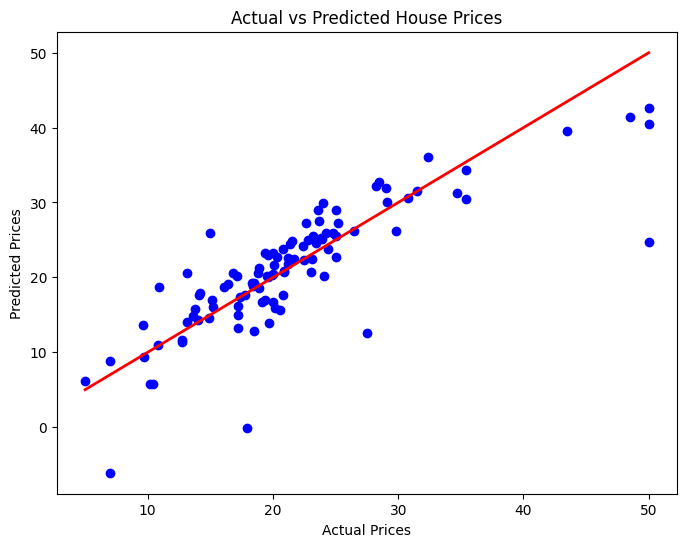

In [ ]:
# Plot the predicted prices vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


Model interpretation

In [ ]:
# Get feature names and coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


         Coefficient
crim       -0.113056
zn          0.030110
indus       0.040381
chas        2.784438
nox       -17.202633
rm          4.438835
age        -0.006296
dis        -1.447865
rad         0.262430
tax        -0.010647
ptratio    -0.915456
b           0.012351
lstat      -0.508571
